<a href="https://colab.research.google.com/github/smeglan/occupancy-detection-classifier/blob/main/SVM_QSAR_biodegradation(modificado).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

In [215]:
from google.colab import files
import io
uploaded = files.upload()
dataframe = pd.read_csv(io.BytesIO(uploaded['biodeg.csv']),delimiter=";")

dataframe.head(10)

Saving biodeg.csv to biodeg (3).csv


,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,Clase experimental
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,0,0.000,3.106,2.550,9.002,0,0.960,1.142,0,0,0,1.201,0,0,0,0,1.932,0.011,0,0.000,4.489,0,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,RB
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,RB
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,RB
5,4.236,3.4286,0,0,0,0,0,28.6,2,4,0,-0.275,3.313,2.522,9.383,1,1.014,1.149,0,0,0,1.119,0,0,0,0,1.980,-0.008,0,10.276,4.746,0,0,0,0,3.351,2.556,0,7.904,0,0,RB
6,5.000,5.0476,1,0,0,0,0,11.1,0,3,0,0.000,2.872,0.722,9.657,0,1.092,1.153,0,0,0,1.125,0,0,0,0,2.000,0.446,0,18.375,0.800,0,0,0,1,4.712,4.583,0,9.303,0,0,RB
7,4.525,3.8301,0,0,0,0,0,31.6,3,2,0,-0.039,3.418,2.468,9.786,5,0.980,1.142,0,0,0,1.179,0,0,0,0,2.119,-0.002,0,11.115,3.889,0,0,0,0,3.379,2.143,0,7.950,0,0,RB
8,4.596,3.0777,0,0,0,0,2,44.4,2,0,0,0.000,2.970,0.875,9.540,0,0.968,1.115,0,0,0,1.328,1,0,0,0,2.175,0.041,0,0.000,1.069,0,0,0,0,3.626,1.917,0,7.939,0,0,RB
9,5.040,3.6112,0,0,1,0,2,41.2,0,4,3,-1.290,3.483,1.258,10.159,8,1.069,1.127,0,1,0,1.199,1,0,0,0,2.323,0.005,0,30.959,1.711,0,1,2,1,3.888,3.500,1,8.706,0,0,RB


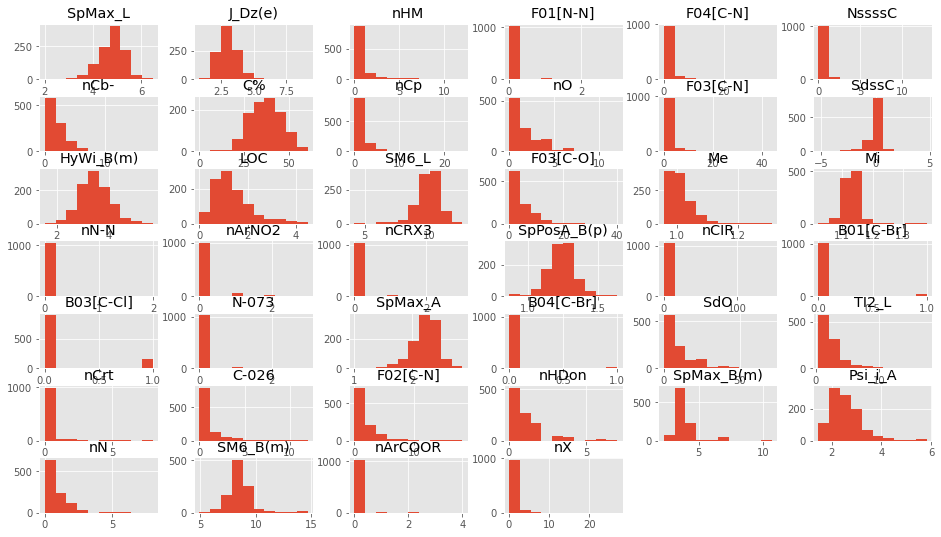

In [195]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

dataframe.drop(["Clase experimental", "Psi_i_1d"],axis=1).hist()
plt.show()

Matriz de correlación

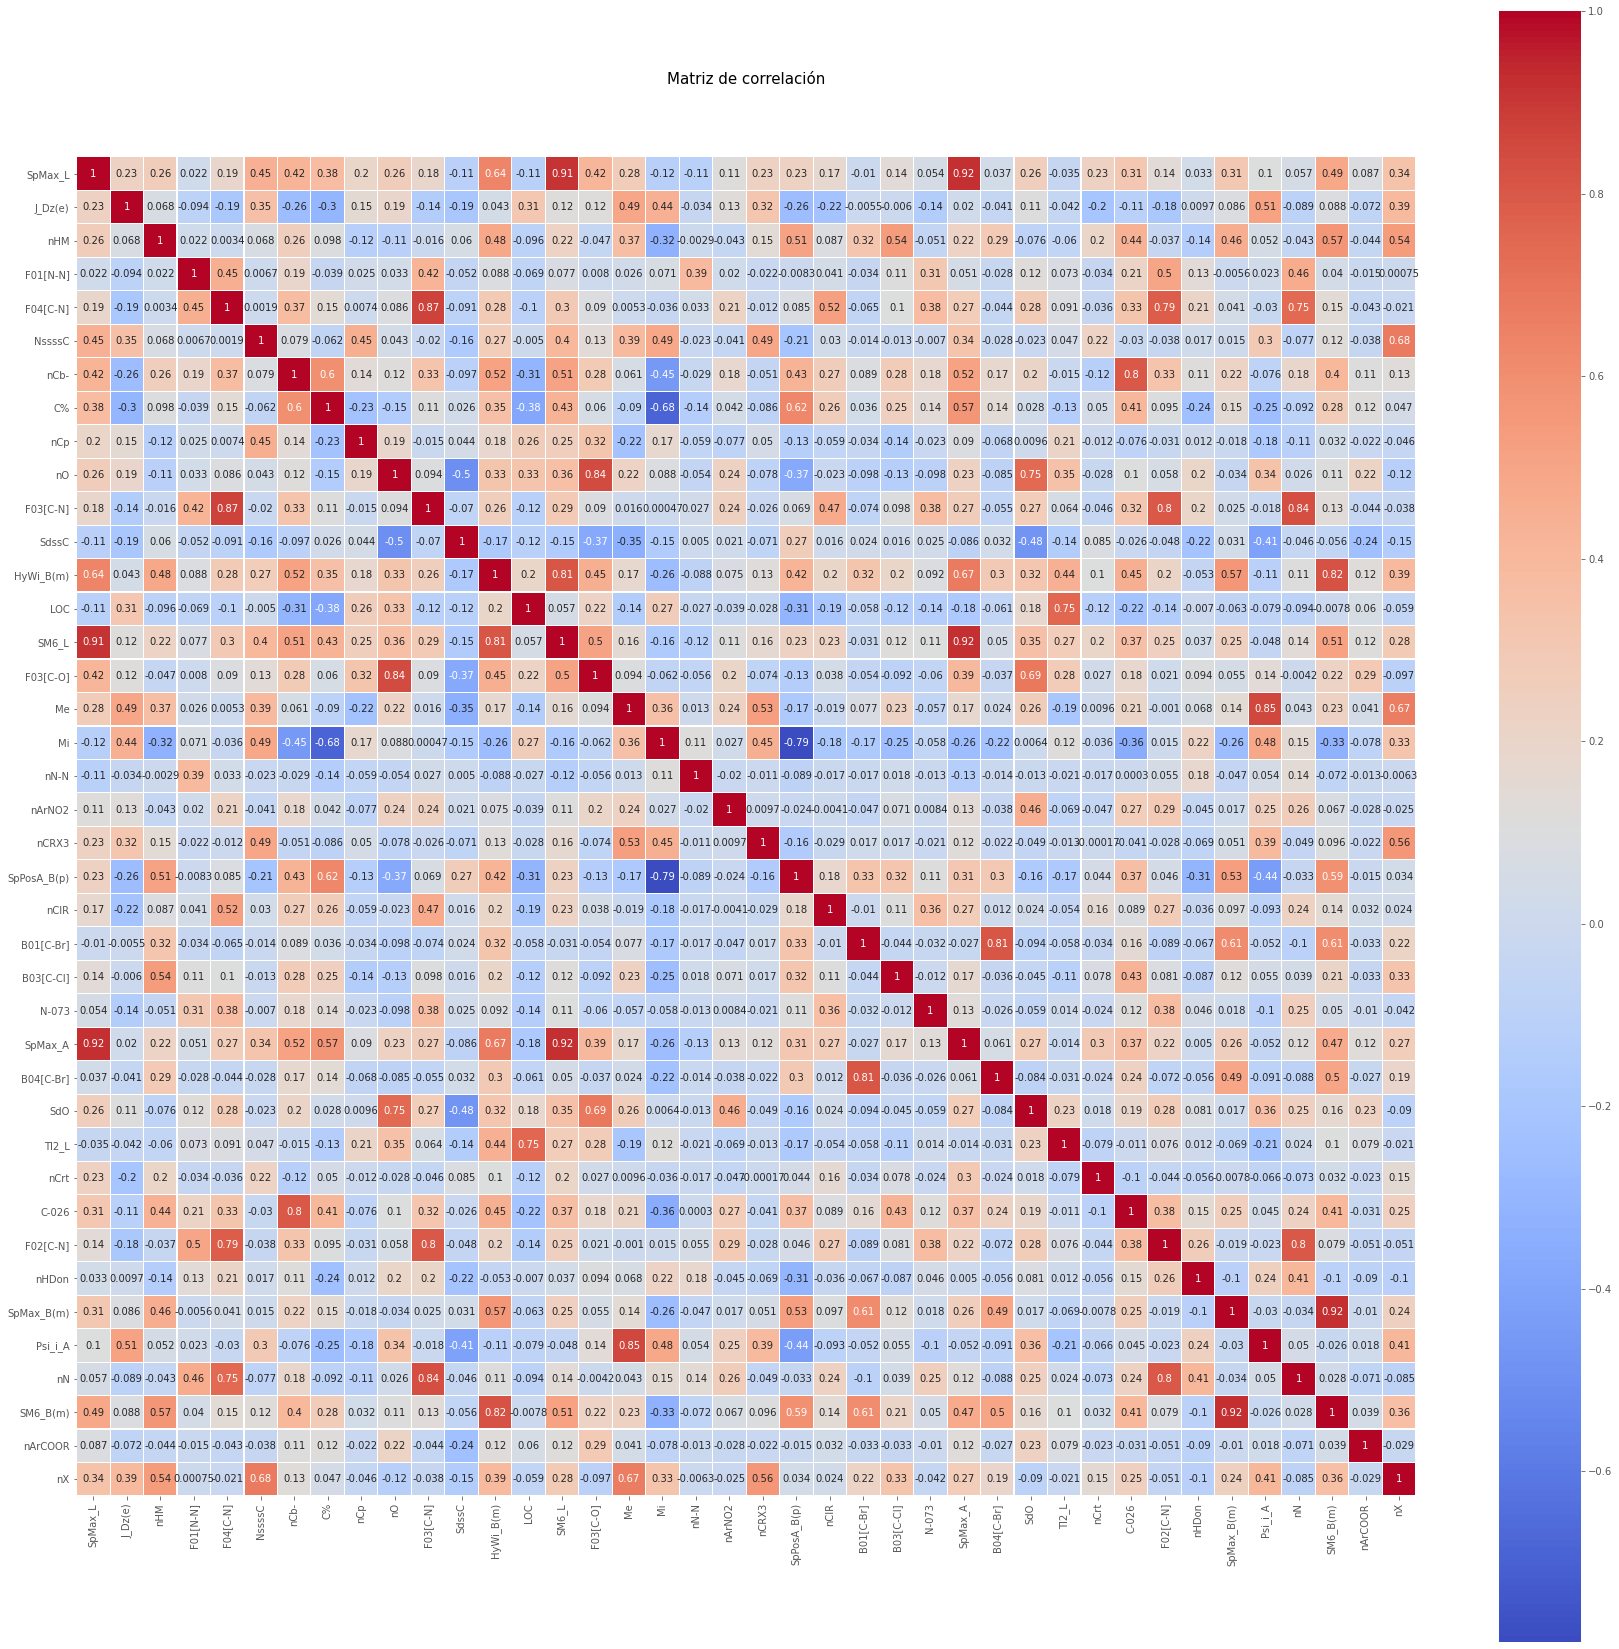

In [194]:
import seaborn as sb
colormap = plt.cm.coolwarm
plt.figure(figsize=(30,30))
plt.title('Matriz de correlación', y=1.05, size=15)
sb.heatmap(dataframe.drop(["Clase experimental", "Psi_i_1d"], axis=1).astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

[1 1 1 ... 0 0 0]
[[134   6]
 [ 17  54]]
Con el 80% del dataset para entrenar
                 precision    recall  f1-score   support

  Biodegradable       0.89      0.96      0.92       140
NoBiodegradable       0.90      0.76      0.82        71

       accuracy                           0.89       211
      macro avg       0.89      0.86      0.87       211
   weighted avg       0.89      0.89      0.89       211

Accuracy = 0.8909952606635071


-------Iteración  1 ------
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        65
           1       0.78      0.68      0.73        41

    accuracy                           0.80       106
   macro avg       0.80      0.78      0.79       106
weighted avg       0.80      0.80      0.80       106



-------Iteración  2 ------
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        68
           1       0.91      0.76      0.83        38

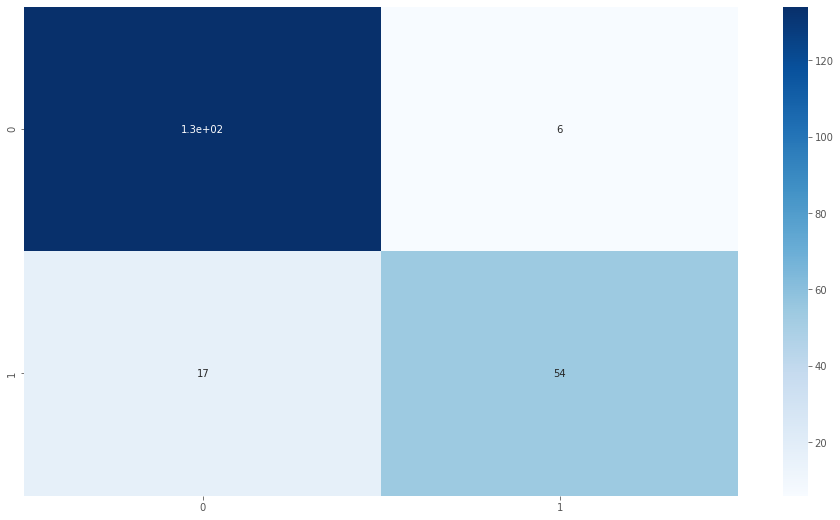

In [228]:
X=dataframe.drop(["Clase experimental", "Psi_i_1d"],axis=1)
y=dataframe["Clase experimental"]
biodegradable=LabelEncoder()
y=biodegradable.fit_transform(y)
print(y)
XTrain,XTest,yTrain,yTest=train_test_split(X,y,test_size=0.2)
escalar=MinMaxScaler()
XTrain=escalar.fit_transform(XTrain)
XTest=escalar.transform(XTest)
modelo=SVC()
modelo.fit(XTrain,yTrain)
yPredict=modelo.predict(XTest)
matriz=confusion_matrix(yTest,yPredict)
sb.heatmap(matriz,annot=True,cmap="Blues")
print(matriz)
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
print("Con el 80% del dataset para entrenar")
precision_recall_fscore_support(yTest,yPredict, average=None)
target_names = ['Biodegradable', 'NoBiodegradable']
print(classification_report(yTest,yPredict, target_names=target_names))
print("Accuracy =",metrics.accuracy_score(yTest,yPredict))
X=escalar.fit_transform(X)
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
kf = KFold(n_splits=10, shuffle=True)
count = 0
score = 0
f1_total = 0
recall = 0
precision = 0
for train, test in kf.split(X, y):
  clf = SVC()
  print("\n\n-------Iteración ", count+1,"------")
  clf.fit(X[train], y[train])
  prediction = clf.predict(X[test])
  #print(prediction)
  #print("Puntuación")
  score1 = clf.score(X[test], y[test])
  #print(score1)
  score = score+score1
  count = count + 1
  f1_total = f1_total + classification_report(y[test],prediction, output_dict=True)['macro avg']['f1-score']
  print(classification_report(y[test],prediction))
print ("\nAccuracy final", score/count)
print ("\nF1 final", f1_total/count)